# Unsupervised Learning - Clustering
## Import Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Sample Data

In [8]:
# Updated Sample business data: Customer Spending with 25 values
data = {
    'CustomerID': range(1, 26),
    'Food_Spending': [100, 200, 150, 400, 300, 250, 800, 850, 700, 750,
                      110, 220, 180, 420, 310, 270, 820, 870, 720, 760,
                      130, 240, 190, 430, 320],
    'Clothing_Spending': [30, 60, 50, 120, 80, 70, 200, 220, 180, 190,
                          40, 65, 55, 125, 85, 75, 205, 225, 185, 195,
                          45, 68, 58, 130, 88],
    'Electronics_Spending': [200, 400, 350, 500, 450, 400, 900, 950, 800, 850,
                             210, 410, 360, 510, 460, 410, 920, 970, 810, 860,
                             220, 420, 370, 520, 470],
}

# Create a DataFrame
df = pd.DataFrame(data)


## Data Pre-Processing

In [9]:
# Feature selection: exclude 'CustomerID'
X = df[['Food_Spending', 'Clothing_Spending', 'Electronics_Spending']]

# Scale the features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering

Iteration 1, SSE: 8.3891668322016


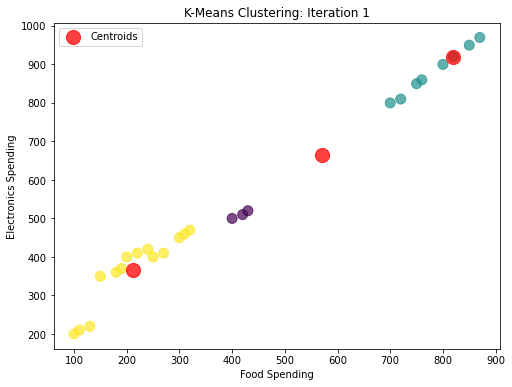

Iteration 2, SSE: 8.3891668322016
SSE did not reduce. Stopping iterations.


In [10]:
# Initialize Clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='random', n_init=1, max_iter=1, verbose=0)
sse = []
all_centroids = []
previous_sse = None
iteration = 0

# Iteratively fit K-Means, stopping if SSE doesn't reduce
while True:
    iteration += 1
    kmeans.fit(X_scaled)
    all_centroids.append(kmeans.cluster_centers_)
    current_sse = kmeans.inertia_
    sse.append(current_sse)

    # Print the SSE for the current iteration
    print(f"Iteration {iteration}, SSE: {current_sse}")

    # Stop if SSE does not reduce
    if previous_sse is not None and current_sse >= previous_sse:
        print("SSE did not reduce. Stopping iterations.")
        break

    previous_sse = current_sse
    df['Cluster'] = kmeans.labels_

    # Visualize the clusters during each iteration
    plt.figure(figsize=(8, 6))
    plt.scatter(df['Food_Spending'], df['Electronics_Spending'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
    current_centroids = scaler.inverse_transform(all_centroids[-1])
    plt.scatter(current_centroids[:, 0], current_centroids[:, 2], c='red', s=200, alpha=0.75, label='Centroids')
    plt.title(f"K-Means Clustering: Iteration {iteration}")
    plt.xlabel("Food Spending")
    plt.ylabel("Electronics Spending")
    plt.legend()
    plt.show()

## SSE Reduction

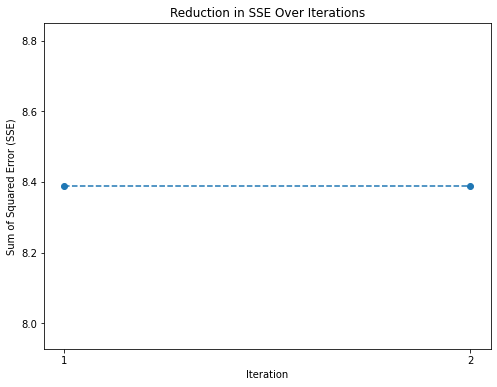

In [11]:
# Plot the Sum of Squared Errors (SSE) reduction over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sse) + 1), sse, marker='o', linestyle='--')
plt.title("Reduction in SSE Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Sum of Squared Error (SSE)")
plt.xticks(range(1, len(sse) + 1))
plt.show()

## Display the Clusters

In [14]:
# Print clusters for the training data as a summary
cluster_summary = df.groupby('Cluster').apply(lambda x: x[['CustomerID', 'Food_Spending', 'Clothing_Spending', 'Electronics_Spending']].to_dict(orient='records'))

# Display cluster summary
print("Cluster Summary for Training Data:")
for cluster_id, records in cluster_summary.items():
    print(f"\nCluster {cluster_id}:")
    for record in records:
        print(record)

Cluster Summary for Training Data:

Cluster 0:
{'CustomerID': 4, 'Food_Spending': 400, 'Clothing_Spending': 120, 'Electronics_Spending': 500}
{'CustomerID': 14, 'Food_Spending': 420, 'Clothing_Spending': 125, 'Electronics_Spending': 510}
{'CustomerID': 24, 'Food_Spending': 430, 'Clothing_Spending': 130, 'Electronics_Spending': 520}

Cluster 1:
{'CustomerID': 7, 'Food_Spending': 800, 'Clothing_Spending': 200, 'Electronics_Spending': 900}
{'CustomerID': 8, 'Food_Spending': 850, 'Clothing_Spending': 220, 'Electronics_Spending': 950}
{'CustomerID': 9, 'Food_Spending': 700, 'Clothing_Spending': 180, 'Electronics_Spending': 800}
{'CustomerID': 10, 'Food_Spending': 750, 'Clothing_Spending': 190, 'Electronics_Spending': 850}
{'CustomerID': 17, 'Food_Spending': 820, 'Clothing_Spending': 205, 'Electronics_Spending': 920}
{'CustomerID': 18, 'Food_Spending': 870, 'Clothing_Spending': 225, 'Electronics_Spending': 970}
{'CustomerID': 19, 'Food_Spending': 720, 'Clothing_Spending': 185, 'Electronics_S

## Predict with Test Data

In [15]:
# New Test Data
test_data = pd.DataFrame({
    'Food_Spending': [120, 500, 700],
    'Clothing_Spending': [40, 100, 210],
    'Electronics_Spending': [300, 600, 950],
})

# Scale the test data
test_data_scaled = scaler.transform(test_data)

# Predict clusters for the test data
test_data['Cluster'] = kmeans.predict(test_data_scaled)

# Display test data with cluster assignments
print("\nTest Data with Predicted Clusters:")
print(test_data)


Test Data with Predicted Clusters:
   Food_Spending  Clothing_Spending  Electronics_Spending  Cluster
0            120                 40                   300        2
1            500                100                   600        0
2            700                210                   950        1
